In [1]:
# This project aims to analyze the damage caused by floods in Assam taking in account various parameters and prediction of future damage due to floods in Assam. 

C:\Users\Shreyjaya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Shreyjaya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


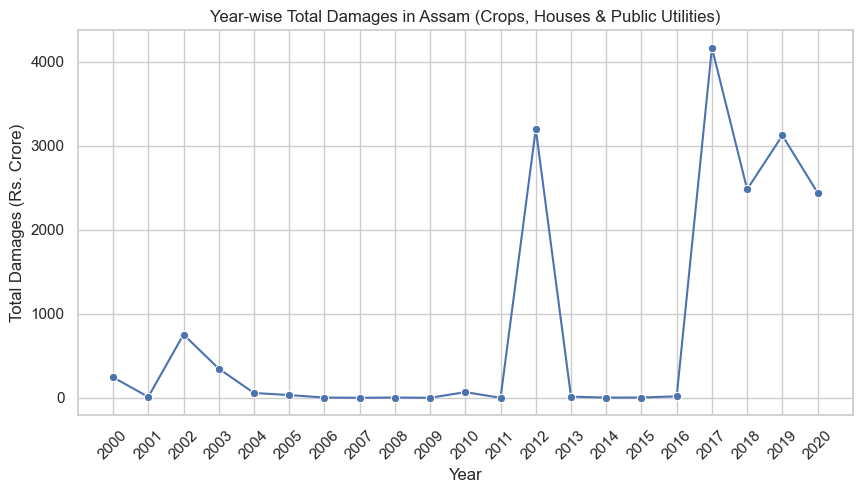

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the Excel file
file_path = "C:/Users/Shreyjaya/OneDrive/Documents/assamdamage.xlsx"
assam_damage_data = pd.read_excel(file_path)

# Set the figure size and style
plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")

# Plotting the trend of Total Damages over the years
sns.lineplot(x='Year', y='Total Damages Crops,Houses & Public Utilities (Rs. Crore)', 
             data=assam_damage_data, marker='o')

# Adding labels and title
plt.title('Year-wise Total Damages in Assam (Crops, Houses & Public Utilities)')
plt.xlabel('Year')
plt.ylabel('Total Damages (Rs. Crore)')
plt.xticks(assam_damage_data['Year'], rotation=45)
plt.grid(True)

# Show the plot
plt.show()



In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Initialize and train the Polynomial Regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Predict future damages
future_years_poly = poly.fit_transform(future_years)
poly_predictions = poly_model.predict(future_years_poly)

# Create DataFrame for predictions
poly_df = pd.DataFrame({
    'Year': future_years.flatten(),
    'Predicted Total Damages (Rs. Crore)': poly_predictions
})

print("Polynomial Regression Predictions:\n", poly_df)


Polynomial Regression Predictions:
    Year  Predicted Total Damages (Rs. Crore)
0  2020                          3035.252463
1  2021                          3483.435536
2  2022                          3962.360856
3  2023                          4472.028423
4  2024                          5012.438237
5  2025                          5583.590299
6  2026                          6185.484607
7  2027                          6818.121163
8  2028                          7481.499966
9  2029                          8175.621016


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


def evaluate_model(model, X, y):
    # Predict using the model
    predictions = model.predict(X)
    
    # Calculate metrics
    mse = mean_squared_error(y, predictions)
    mae = mean_absolute_error(y, predictions)
    r2 = r2_score(y, predictions)
    
    # Print the metrics
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R-squared (R²): {r2}")
    
    return mse, mae, r2


In [33]:
# Assuming X and y are the original data used for training

# Linear Regression
print("Linear Regression:")
linear_model = LinearRegression()
linear_model.fit(X, y)
evaluate_model(linear_model, X, y)
print()

# Support Vector Machine (SVM)
print("Support Vector Machine (SVM):")
svm_model = SVR(kernel='rbf')
svm_model.fit(X, y)
evaluate_model(svm_model, X, y)
print()

# Random Forest
print("Random Forest:")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)
evaluate_model(rf_model, X, y)
print()

# Gradient Boosting
print("Gradient Boosting:")
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X, y)
evaluate_model(gb_model, X, y)
print()

# Polynomial Regression
print("Polynomial Regression:")
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
evaluate_model(poly_model, X_poly, y)
print()


Linear Regression:
Mean Squared Error (MSE): 1161291.9527396893
Mean Absolute Error (MAE): 880.3350482787073
R-squared (R²): 0.33173991228945987

Support Vector Machine (SVM):
Mean Squared Error (MSE): 2336660.06500416
Mean Absolute Error (MAE): 800.1149164703046
R-squared (R²): -0.34462023637170214

Random Forest:
Mean Squared Error (MSE): 177633.8342744057
Mean Absolute Error (MAE): 247.5956066666669
R-squared (R²): 0.8977814309377355

Gradient Boosting:
Mean Squared Error (MSE): 82.48415748329694
Mean Absolute Error (MAE): 7.358380687400695
R-squared (R²): 0.9999525348727472

Polynomial Regression:
Mean Squared Error (MSE): 908901.550271191
Mean Absolute Error (MAE): 619.120479082011
R-squared (R²): 0.4769768030583946



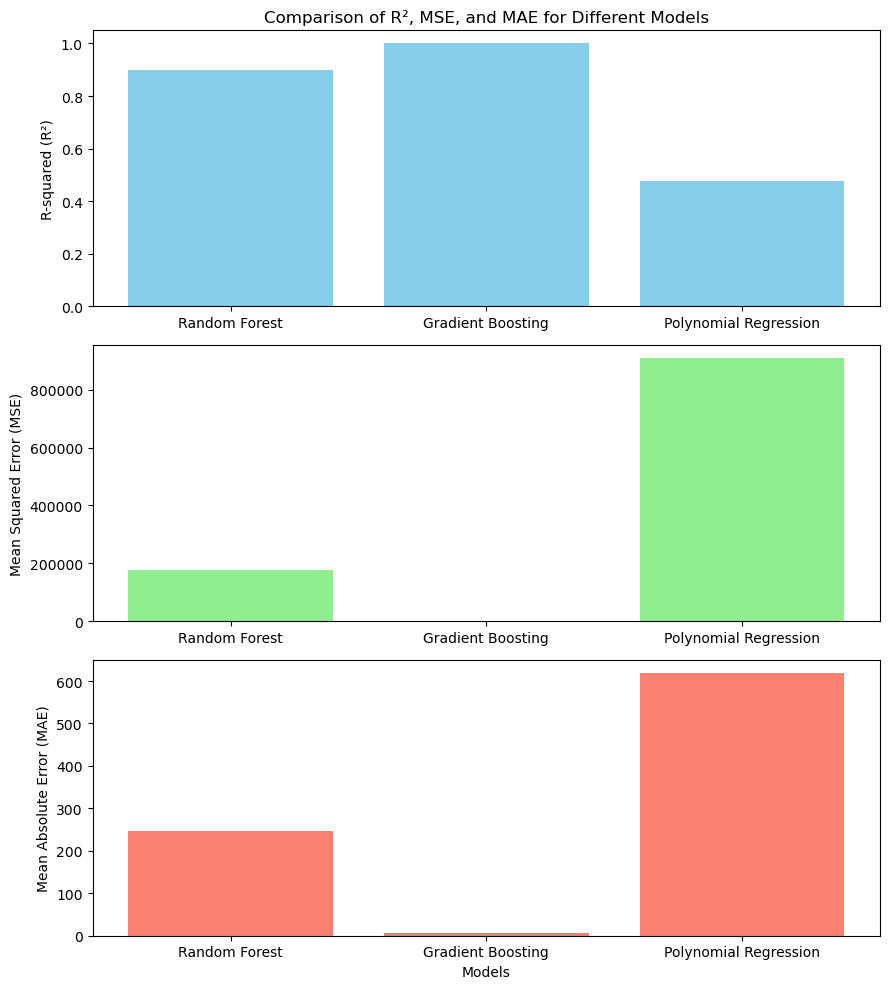

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the models
models = ['Random Forest', 'Gradient Boosting', 'Polynomial Regression']
r_squared = [0.8977814309377355, 0.9999525348727472, 0.4769768030583946]
mse = [177633.8342744057, 82.48415748329694, 908901.550271191]
mae = [247.5956066666669, 7.358380687400695, 619.120479082011]

# Plotting R-squared
plt.figure(figsize=(9, 10))

plt.subplot(3, 1, 1)
plt.bar(models, r_squared, color='skyblue')
plt.ylabel('R-squared (R²)')
plt.title('Comparison of R², MSE, and MAE for Different Models')

# Plotting MSE
plt.subplot(3, 1, 2)
plt.bar(models, mse, color='lightgreen')
plt.ylabel('Mean Squared Error (MSE)')

# Plotting MAE
plt.subplot(3, 1, 3)
plt.bar(models, mae, color='salmon')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xlabel('Models')

plt.tight_layout()
plt.show()


In [35]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X, y)

# Predict future damages
gb_predictions = gb_model.predict(future_years)

# Create DataFrame for predictions
gb_df = pd.DataFrame({
    'Year': future_years.flatten(),
    'Predicted Total Damages (Rs. Crore)': gb_predictions
})

print("Gradient Boosting Predictions:\n", gb_df)


Gradient Boosting Predictions:
    Year  Predicted Total Damages (Rs. Crore)
0  2020                          2445.972838
1  2021                          2445.972838
2  2022                          2445.972838
3  2023                          2445.972838
4  2024                          2445.972838
5  2025                          2445.972838
6  2026                          2445.972838
7  2027                          2445.972838
8  2028                          2445.972838
9  2029                          2445.972838


C:\Users\Shreyjaya\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the training data to evaluate model performance
train_predictions = gb_model.predict(X)

# Calculate MSE, MAE, and R² score
mse = mean_squared_error(y, train_predictions)
mae = mean_absolute_error(y, train_predictions)
r2 = r2_score(y, train_predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 82.48415748329694
Mean Absolute Error (MAE): 7.358380687400695
R-squared (R²): 0.9999525348727472


In [43]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Predict future damages
rf_predictions = rf_model.predict(future_years)

# Create DataFrame for predictions
rf_df = pd.DataFrame({
    'Year': future_years.flatten(),
    'Predicted Total Damages (Rs. Crore)': rf_predictions
})

print("Random Forest Predictions:\n", rf_df)


Random Forest Predictions:
    Year  Predicted Total Damages (Rs. Crore)
0  2020                           2661.53013
1  2021                           2661.53013
2  2022                           2661.53013
3  2023                           2661.53013
4  2024                           2661.53013
5  2025                           2661.53013
6  2026                           2661.53013
7  2027                           2661.53013
8  2028                           2661.53013
9  2029                           2661.53013


C:\Users\Shreyjaya\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


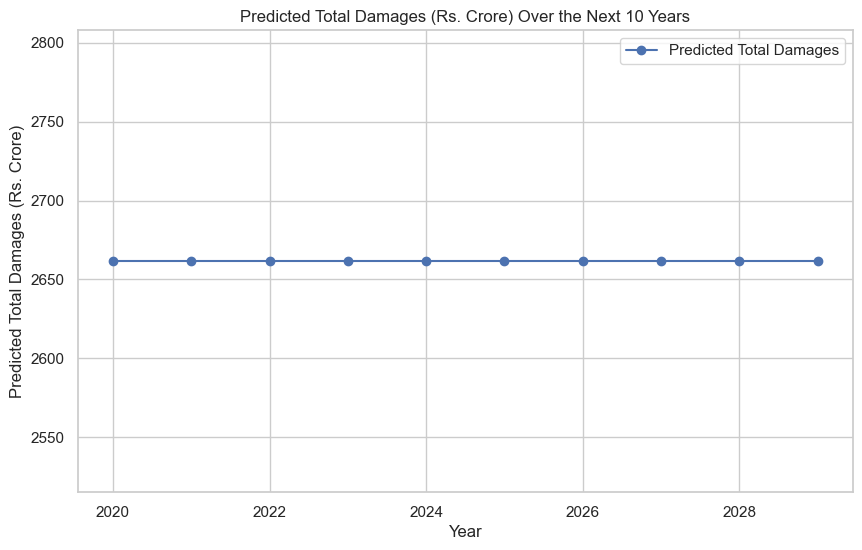

In [45]:
import matplotlib.pyplot as plt

# Plotting the predicted values
plt.figure(figsize=(10, 6))
plt.plot(future_years, rf_predictions, marker='o', linestyle='-', color='b', label='Predicted Total Damages')

# Adding titles and labels
plt.title('Predicted Total Damages (Rs. Crore) Over the Next 10 Years')
plt.xlabel('Year')
plt.ylabel('Predicted Total Damages (Rs. Crore)')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()
